In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [21]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\Siddharth\AppData\Local\Temp\ipykernel_22908\1031380684.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes=pd.value_counts(data['Class'],sort=True).sort_index()


Text(0, 0.5, 'Frequency')

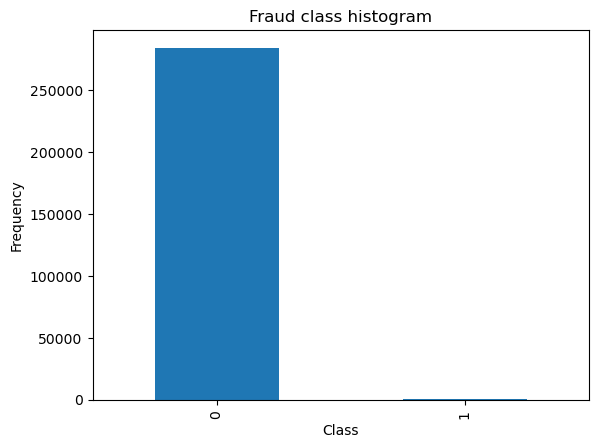

In [22]:
count_classes=pd.value_counts(data['Class'],sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [23]:
from sklearn.preprocessing import StandardScaler

### Standard Scaler
Standard Scaler is used for feature scaling ,transforming your data so that each feature has:
Mean=0 and Standard Deviation=1
z=(x-u)/sigma
where u=mean of feature and sigma=standard deviation of the feature

### Why we used it in this
Neural networks & distance-based models work best when features are on a similar scale.
In our credit card dataset, Columns or features like V!,V2,V3 etc are alerady scaled by PCA.
But columns like AMount & Time columns are not scaled.

In [24]:
data['normalAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Explaination:
We selected the Amount column from the dataset and reshaped into a 2D array since the Stnadard Scaler needs a 2D input i.e rows x columns
Then we  calaculate the mean & standard deviation of Amount and , scale each value so the column has mean 0 and standard deviation 1.

We store the result in a new column called normalAmount.
We then removed the 2 unecessary columns like Time as it is not much useful in training the model for this data
We also removed the Amount column as it is replaced by the standard scaled 'normalAmount' column.

### AutoEncoders


In [25]:
class AutoEncoder(object):
    def __init__(self,n_hidden_1,n_hidden_2,n_input,learning_rate):
        self.n_hidden_1=n_hidden_1
        self.n_hidden_2=n_hidden_2
        self.n_input=n_input
        self.learning_rate=learning_rate
        self.weights,self.biases=self.initialize_weights()
        self.x=tf.placeholder("float",[None,self.n_input])

        self.encoder_op=self.encoder(self.x)
        self.decoder_op=self.decoder(self.encoder_op)

        self.cost=tf.reduce_mean(tf.pow(self.x-self.decoder_op,2))
        self.optimizer=tf.train.RMSPropOptimizer(self.learning_rate).minimize(self.cost)

        init=tf.initialize_all_variables()
        self.sess=tf.Session()
        self.sess.run(init)

    def initialize_weights(self):
        weights={
            'encoder_h1':tf.Variable(tf.random.normal([self.n_input,self.n_hidden_1])),
            'encoder_h2':tf.Variable(tf.random.normal([self.n_hidden_1,self.n_hidden_2])),
            'decoder_h1':tf.Variable(tf.random.normal([self.n_hidden_2,self.n_hidden_1])),
            'decoder_h2':tf.Variable(tf.random.normal([self.n_hidden_1,self.n_input]))
        }
        biases={
            'encoder_b1':tf.Variable(tf.random.normal([self.n_hidden_1])),
            'encoder_b2':tf.Variable(tf.random.normal([self.n_hidden_2])),
            'decoder_b1':tf.Variable(tf.random.normal([self.n_hidden_1])),
            'decoder_b2':tf.Variable(tf.random.normal([self.n_input]))
        }
        return weights,biases
    
    def encoder(self,x):
        layer_1=tf.nn.sigmoid(tf.add(tf.matmul(x,self.weights['encoder_h1']),self.biases['encoder_b1']))
        layer_2=tf.nn.sigmoid(tf.add(tf.matmul(layer_1,self.weights['encoder_h2']),self.biases['encoder_b2']))

        return layer_2
    
    def decoder(self,X):
        layer_1=tf.nn.sigmoid(tf.add(tf.matmul(X,self.weights['decoder_h1']),self.biases['decoder_b1']))
        layer_2=tf.nn.sigmoid(tf.add(tf.matmul(layer_1,self.weights['decoder_h2']),self.biases['decoder_b2']))
        return layer_2
    def calc_total_cost(self,X):
        return self.sess.run(self.cost,feed_dict={self.x:X})
    def partial_fit(self,X):
        cost,opt=self.sess.run((self.cost,self.optimizer),feed_dict={self.x:X})
        return cost
    def transform(self,X):
        return self.sess.run(self.encoder_op,feed_dict={self.x:X})
    def reconstruct(self,X):
        return self.sess.run(self.decoder_op,feed_dict={self.x:X})    

### What is this 🙃!!!
An autoencoder is an unsupervised neural network that learns to compress (encode) input data to a lower-dimensional representation (the bottleneck) and then reconstruct (decode) the original input from that compressed representation.
Because they do not rely on labeled training data, autoencoders are not considered a supervised learning method. Like all unsupervised learning methods, autoencoders are trained to discover hidden patterns in unlabeled data, rather than to predict known patterns demonstrated in labeled training data; however, like supervised learning models—and unlike most examples of unsupervised learning—autoencoders have a ground truth to measure their output against: the original input itself (or some modified version of it). For that reason, they are considered “self-supervised learning”–hence, autoencoder.

Common uses: dimensionality reduction, denoising, representation learning, and anomaly detection (train on "normal" data; anomalies reconstruct poorly → high reconstruction error).


Here in this class AutoEncoder,we've defined the parameters as self(more like this in JS),n_hidden_1(size of first hidden layer),n_hidden_2(size of bottleneck/second hidden layer(smaller)), n_input(input dimaensionality),learning_rate(optimizer learning rate)

### Storing hyperparameters and initializing weights/biases
We save the parameters to self and call initialize weights to create and return dictionaries weights and biases which are stored in self.weights and self.biases

### Initialize weights Function:
So in this function we return 2 dictionaries ie weights and biases
1. Weights sre used to store the weight matrices for each layer, each weight matrix maps from one layer's outputs to next layers inputs
2. Biases store bias vectors for each layer
3. Encoder_h1 is weights from input to encoder hidden layer 1
4. encoder_h2: weights from hidden 1 to bottlenk (hidden2)
5. decoder_h1:Weights from bottleneck  to decoder hidden 1



In [26]:
from sklearn.model_selection import train_test_split

In [27]:
good_data=data[data['Class']==0]
bad_data=data[data['Class']==1]

Above we select the rows where Class is 0 and rows wheere class is 1

Class =0 means non-fraud transactions i.e normal

Class =1 means fraudulent transactions 



In [28]:
X_train,X_test=train_test_split(data,test_size=0.2,random_state=42)

X_train=X_train[X_train['Class']==0]
X_train=X_train.drop(['Class'],axis=1)

y_test=X_test['Class']
X_test=X_test.drop(['Class'],axis=1)

X_train = X_train.values
X_test = X_test.values


In [29]:
X_good=good_data.loc[:,good_data.columns!='Class']
y_good=good_data.loc[:,good_data.columns=='Class']

X_bad=bad_data.loc[:,bad_data.columns!='Class']
y_bad=bad_data.loc[:,bad_data.columns=='Class']

In [30]:
model = AutoEncoder(n_hidden_1=15, n_hidden_2=3, n_input=X_train.shape[1], learning_rate = 0.01)


In [31]:
training_epochs = 100
batch_size = 256
display_step = 100
record_step = 10

In [33]:
total_batch=int(X_train.shape[0]/batch_size)
cost_summary=[]

for epoch in range(training_epochs):
    cost=None
    for i in range(total_batch):
        batch_start=i*batch_size
        batch_end=(i+1)*batch_size
        batch=X_train[batch_start:batch_end,:]

        cost=model.partial_fit(batch)
    if epoch % display_step==0 or epoch % record_step==0:
        total_cost=model.calc_total_cost(X_train)

        if epoch % record_step==0:
            cost_summary.append({'epoch':epoch+1,'cost':total_cost})

        if epoch % display_step==0:
            print("Epoch:{},cost={:.9f}".format(epoch+1,total_cost))

Epoch:1,cost=0.872342706


### Epoch

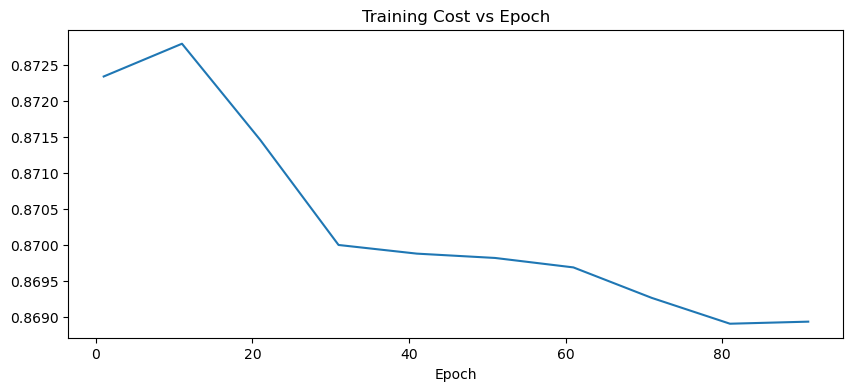

In [34]:
f,ax1=plt.subplots(1,1,figsize=(10,4))
ax1.plot(list(map(lambda x:x['epoch'],cost_summary)),list(map(lambda x:x['cost'],cost_summary)))
ax1.set_title("Training Cost vs Epoch")

plt.xlabel("Epoch")
plt.show()

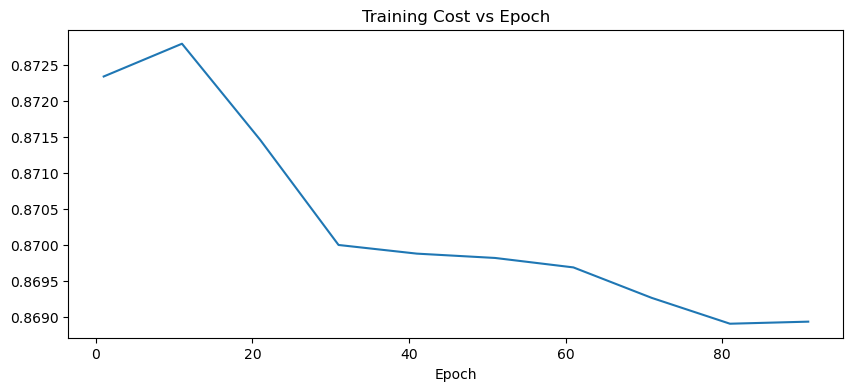

In [35]:
f,ax1=plt.subplots(1,1,figsize=(10,4))
ax1.plot(list(map(lambda x:x['epoch'],cost_summary)),list(map(lambda x:x['cost'],cost_summary)))
ax1.set_title("Training Cost vs Epoch")

plt.xlabel("Epoch")
plt.show()

In [36]:

def get_df(orig,ed,_y):
    root_mean_square=np.mean(np.power(orig-ed,2),axis=1)
    return pd.DataFrame({'rmse':root_mean_square,'target':_y})

In [39]:
encode_decode = model.reconstruct(X_test)


In [40]:
# Function call
df=get_df(X_test,encode_decode,y_test)

In [41]:
df.describe()

,rmse,target
count,56962.000000,56962.000000
mean,0.896596,0.001720
std,3.777238,0.041443
min,0.048703,0.000000
25%,0.284152,0.000000
50%,0.468210,0.000000
75%,0.748504,0.000000
max,259.991664,1.000000


### Insights from o/p

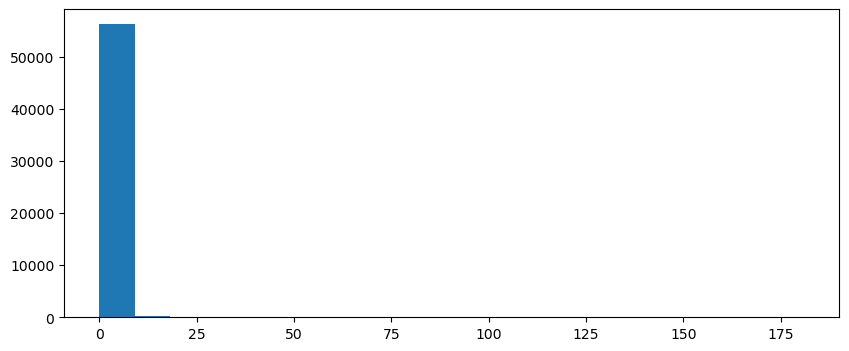

In [42]:
fig=plt.figure(figsize=(10,4))
ax=fig.add_subplot(111)
temp_hist=ax.hist(df[df['target']==0].rmse.values,bins=20)

### Histogam Insights

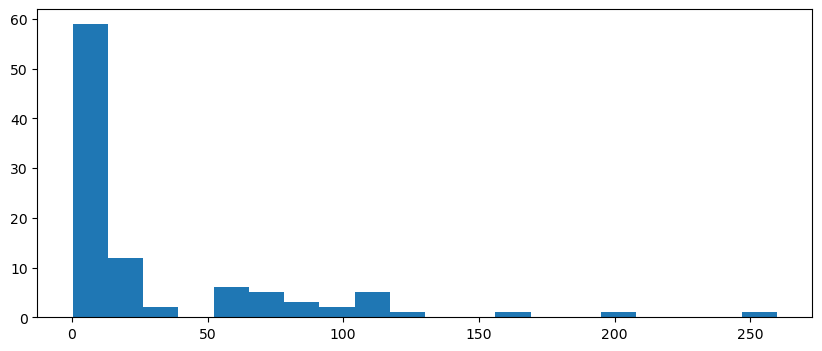

In [43]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
_=ax.hist(df[df['target'] > 0].rmse.values, bins=20)

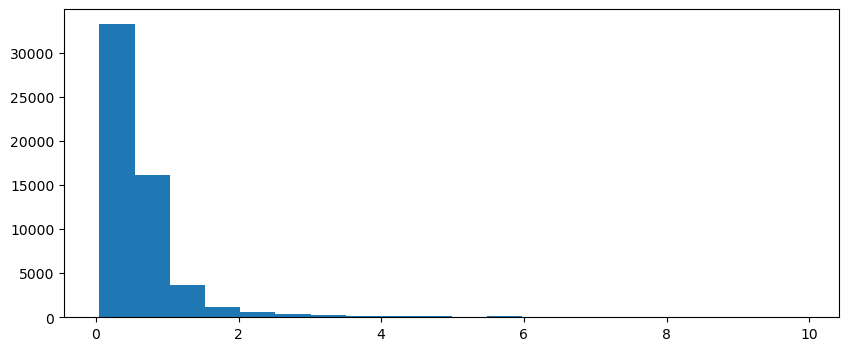

In [44]:

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
_ = ax.hist(df[(df['target']== 0) & (df['rmse'] < 10)].rmse.values, bins=20)

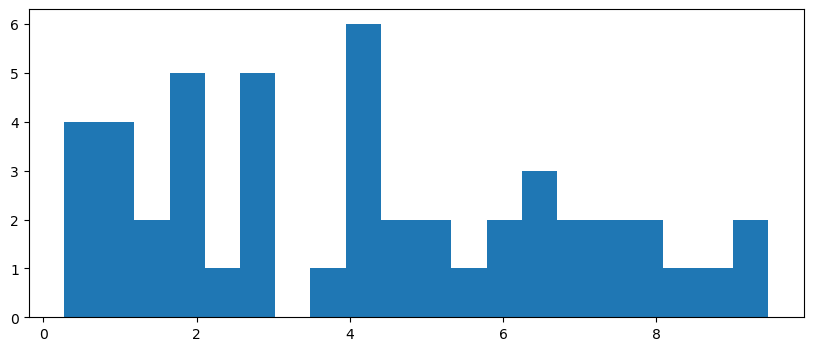

In [45]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
_ = ax.hist(df[(df['target'] > 0) & (df['rmse'] < 10)].rmse.values, bins=20)

In [46]:

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_auc_score, 
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support) 

In [47]:
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    else:
        1
    thresh=cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


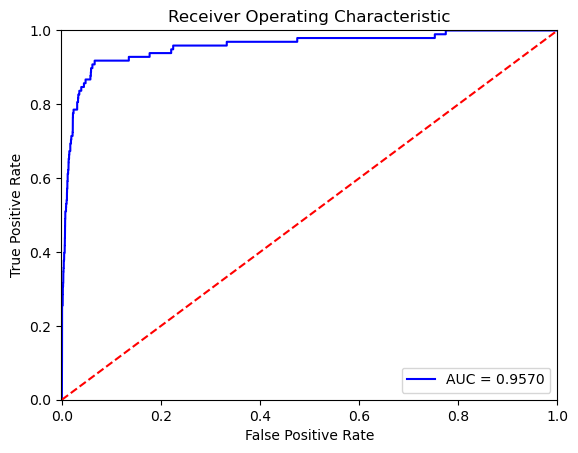

In [48]:
fpr, tpr, thresholds = roc_curve(df.target, df.rmse)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

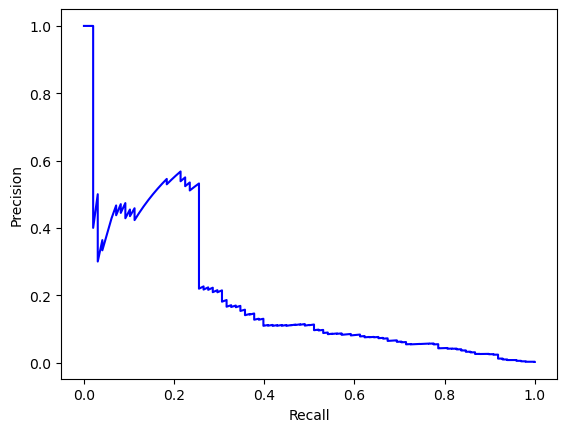

In [49]:

precision, recall, th = precision_recall_curve(df.target, df.rmse)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

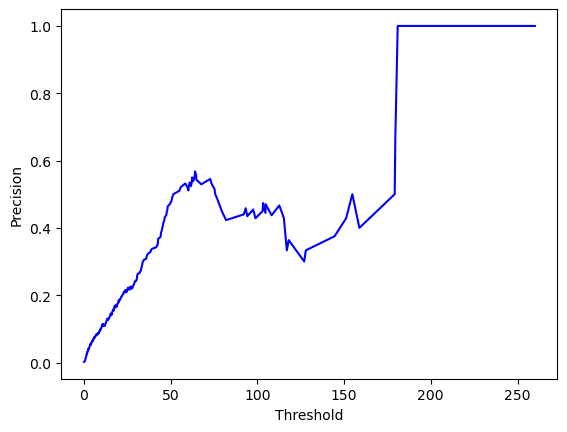

In [50]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

Recall metric in the testing dataset:  0.8571428571428571


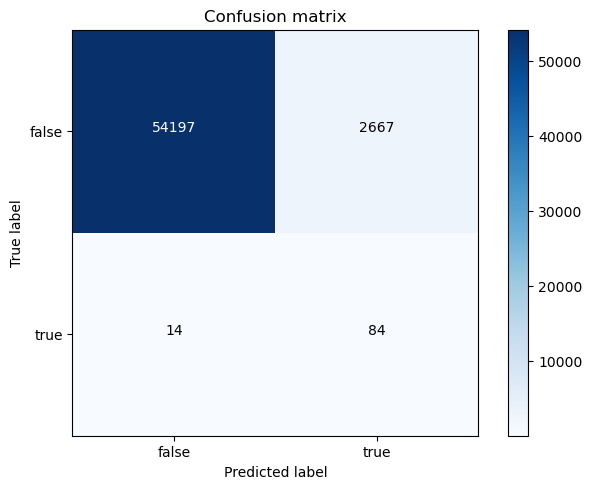

In [51]:
y_pred = [1 if p > 2 else 0 for p in df.rmse.values]
cnf_matrix = confusion_matrix(df.target, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = ['false','true']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()


### The last step i.e the Confusion Matrix
We check whether  the elements inside the array of df.rmse.values is > 2 if yes then we predict 1 ie positive 

Else 0 ie normal/negative

We return y_pred as a result ie a list ogf 0/1 predictions of length len(df)

### What is RMSE but?
Root Mean Square Error(RMSE)
The RMSD of a sample is the quadratic mean of the differences between the observed values and predicted ones. These deviations are called residuals when the calculations are performed over the data sample that was used for estimation (and are therefore always in reference to an estimate) and are called errors (or prediction errors) when computed out-of-sample (aka on the full set, referencing a true value rather than an estimate)

In [52]:
f1_score(y_pred=y_pred, y_true = df.target)


0.05896805896805897

In [53]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

# Get metrics
precision, recall, fscore, support = precision_recall_fscore_support(
    y_true=df.target,
    y_pred=y_pred
)

# Put into a DataFrame
results_df = pd.DataFrame({
    "Class": [0, 1],
    "Precision": precision,
    "Recall": recall,
    "F1-score": fscore,
    "Support": support
})

print(results_df)


   Class  Precision    Recall  F1-score  Support
0      0   0.999742  0.953099  0.975863    56864
1      1   0.030534  0.857143  0.058968       98


In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(df.target, y_pred)
print(f"Accuracy: {accuracy*100:.4f}")
precision=precision_score(df.target, y_pred)
print(f"Precision: {precision*100:.4f}")


Accuracy: 95.2934
Precision: 3.0534


In [57]:
from sklearn.metrics import precision_recall_curve, auc

# Get probabilities or scores from your model
# For your autoencoder: use reconstruction_errors instead of probabilities
precision, recall, thresholds = precision_recall_curve(df.target, reconstruction_errors)

# Compute PR AUC
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(7,5))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Fraud Detection")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'reconstruction_errors' is not defined